# Guided Project: Clean and Analyze Employee Exit Surveys

This is the guided project for the _Data Cleaning and Analysis_ Dataquest course. In this project, I analyze exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia (available [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey), respectively). 

This project focuses on the following questions:
1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

Several columns will be particularly important in answering these questions, including the following:

| Column Name                                                                 | Dataset | Description                                           |
|-----------------------------------------------------------------------------|---------|-------------------------------------------------------|
| `ID`                                                                        | DETE    | Unique identifier used to identify survey participant |
| `SeparationType`                                                            | DETE    | Reason that participant's employment ended            |
| `Cease Date`                                                                | DETE    | Year or month that participant's employment ended     |
| `DETE Start Date`                                                           | DETE    | Year that participant's employment began              |
| `Age`                                                                       | DETE    | Participant's age                                     |
| `Gender`                                                                    | DETE    | Participant's gender                                  |
| `Record ID`                                                                 | TAFE    | Unique identifier used to identify survey participant |
| `Reason for ceasing employment`                                             | TAFE    | Reason that participant's employment ended            |
| `CESSATION YEAR`                                                            | TAFE    | Year that participant's employment ended              |
| `LengthofServiceOverall. Overall Length of Service at Institute (in years)` | TAFE    | Length of participant's employment (in years)         |
| `CurrentAge. Current Age`                                                   | TAFE    | Participant's age                                     |
| `Gender. What is your Gender?`                                              | TAFE    | Participant's gender                                  |

In [1]:
# ensure plots display inline
%matplotlib inline
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# read in datasets
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')
# print information about and first five rows of each dataset
print(dete_survey.info())
print(dete_survey.head())
print(tafe_survey.info())
print(tafe_survey.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

It's clear from the above that each dataset contains many columns (56 and 72, respectively) that aren't necessary to complete our analysis. In addition, while both datasets have columns that offer the same or similar information (e.g., ID number or reason for ceasing employment), the columns are named differently.

Some columns also have quite lengthy, unwieldy names, particularly in the TAFE dataset (e.g., column 39, which is titled `"WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job"`). Based on the format of these column names, it appears that they may have been directly copied from questions in the exit survey. Many of these columns won't be relevant for this project's analysis, but some will (such as the age and gender columns)—to make the dataset easier to examine, it may be helpful to rename these columns.

In [2]:
# print missing values for key columns
print('Missing values in ID column (DETE): ' + str(dete_survey['ID'].isnull().sum()))
print('Missing values in SeparationType column (DETE): '
      + str(dete_survey['SeparationType'].isnull().sum()))
print('Missing values in Cease Date column (DETE): '
      + str(dete_survey['Cease Date'].isnull().sum()))
print('Missing values in DETE Start Date column (DETE): '
      + str(dete_survey['DETE Start Date'].isnull().sum()))
print('Missing values in Age column (DETE): '
      + str(dete_survey['Age'].isnull().sum()))
print('Missing values in Gender column (DETE): '
      + str(dete_survey['Gender'].isnull().sum()))
print('Missing values in Record ID column (TAFE): '
      + str(tafe_survey['Record ID'].isnull().sum()))
print('Missing values in Reason for Ceasing Employment column (TAFE): '
      + str(tafe_survey['Reason for ceasing employment'].isnull().sum()))
print('Missing values in Cessation Year column (TAFE): '
      + str(tafe_survey['CESSATION YEAR'].isnull().sum()))
print('Missing values in Length of Service column (TAFE): '
      + str(tafe_survey['LengthofServiceOverall. Overall Length of Service at Institute (in years)'].isnull().sum()))
print('Missing values in Age column (TAFE): '
      + str(tafe_survey['CurrentAge. Current Age'].isnull().sum()))
print('Missing values in Gender column (TAFE): '
      + str(tafe_survey['Gender. What is your Gender?'].isnull().sum()))

Missing values in ID column (DETE): 0
Missing values in SeparationType column (DETE): 0
Missing values in Cease Date column (DETE): 0
Missing values in DETE Start Date column (DETE): 0
Missing values in Age column (DETE): 11
Missing values in Gender column (DETE): 24
Missing values in Record ID column (TAFE): 0
Missing values in Reason for Ceasing Employment column (TAFE): 1
Missing values in Cessation Year column (TAFE): 7
Missing values in Length of Service column (TAFE): 106
Missing values in Age column (TAFE): 106
Missing values in Gender column (TAFE): 106


As shown above, the age and gender columns in both datasets have missing values. There are also missing values for other columns in the TAFE dataset, namely reason for ceasing employment (only one null value), cessation year (seven null values), and length of service (106 missing values).

It's worth noting that the age, gender, and length of service columns in the TAFE dataset have the same number of missing values (106), indicating that there may be issues with the same rows in this dataset.

In [3]:
# value counts for key columns in DETE dataset
print('Separation Type (DETE) Value Counts')
print(dete_survey['SeparationType'].value_counts())
print('Cease Date (DETE) Value Counts')
print(dete_survey['Cease Date'].value_counts())
print('Start Date (DETE) Value Counts')
print(dete_survey['DETE Start Date'].value_counts())
print('Age (DETE) Value Counts')
print(dete_survey['Age'].value_counts())
print('Gender (DETE) Value Counts')
print(dete_survey['Gender'].value_counts())

Separation Type (DETE) Value Counts
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64
Cease Date (DETE) Value Counts
2012          344
2013          200
01/2014        43
12/2013        40
09/2013        34
Not Stated     34
06/2013        27
07/2013        22
10/2013        20
11/2013        16
08/2013        12
05/2013         7
05/2012         6
04/2013         2
02/2014         2
04/2014         2
07/2014         2
08/2012         2
11/2012         1
07/2012         1
09/2010         1
07/2006         1
2010            1
2014            1
09/2014         1
Name: Cease Date, dtype: int64
Start Date (DETE) Val

As shown above, the most common reason for ceasing employment in the DETE dataset is reaching retirement age. Consistent with this, the majority of employees are over the age of 50 (and many over the age of 60) at the time of their exit survey. In addition, there are roughly 2.5 times more women than men in the dataset.

In the cease date column, date formats vary a bit—some only year, others month/year. Cease dates range from 2010 to 2014 (the vast majority in 2012 and 2013), with the exception of one respondent whose employment ended in 2006. In addition, 34 respondents are listed as "not stated," indicating that they should be counted as missing values, as well.

Similarly, the most common value in the start date column is "not stated" (73). Other than that, many participants started working at DETE after 2000.

In [4]:
# value counts for key columns in TAFE dataset
print('Reason for Ceasing Employment (TAFE) Value Counts')
print(tafe_survey['Reason for ceasing employment'].value_counts())
print('Cessation Year (TAFE) Value Counts')
print(tafe_survey['CESSATION YEAR'].value_counts())
print('Length of Service (TAFE) Value Counts')
print(tafe_survey['LengthofServiceOverall. Overall Length of Service at Institute (in years)'].value_counts())
print('Age (TAFE) Value Counts')
print(tafe_survey['CurrentAge. Current Age'].value_counts())
print('Gender (TAFE) Value Counts')
print(tafe_survey['Gender. What is your Gender?'].value_counts())

Reason for Ceasing Employment (TAFE) Value Counts
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: Reason for ceasing employment, dtype: int64
Cessation Year (TAFE) Value Counts
2011.0    268
2012.0    235
2010.0    103
2013.0     85
2009.0      4
Name: CESSATION YEAR, dtype: int64
Length of Service (TAFE) Value Counts
Less than 1 year      147
1-2                   102
3-4                    96
11-20                  89
More than 20 years     71
5-6                    48
7-10                   43
Name: LengthofServiceOverall. Overall Length of Service at Institute (in years), dtype: int64
Age (TAFE) Value Counts
56 or older      162
51-55             82
41  45            80
46  50            59
31  35            52
36  40            51
26  30            50
21  25            44
20 or younger     16
Name: CurrentAge. Current Age, dtype: int

In contrast to the DETE dataset, the most common reason for ceasing employment in the TAFE dataset is resignation. The most common length of employments are less than one year and one to two years; the least common lengths of employments appear to be medium-length terms (between five and 10 years). The distribution of cessation years here resembles that in the DETE dataset, albeit with a slightly smaller spread: Almost all participants stopped working at TAFE betweeen 2010 and 2013, with a handful in 2009.

As in the DETE dataset, female employees outnumber male employees (though less drastically), and employees are generally older at the time of their exit interview. The two datasets do, however, use different age brackets; for instance, in the TAFE dataset, there's only one cohort aged 56 or older, whereas the DETE dataset further breaks down this age group into those aged 56–60 and those aged 61 or older.

I'll now re-read the `csv` files into pandas, but this time treating "Not Stated" values as `NaN`. I'll also drop some of the columns that won't be used in the analysis in order to make these dataframes easier to work with.

In [5]:
# re-read files into pandas, treating 'Not Stated' values as NaN
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')
tafe_survey = pd.read_csv('tafe_survey.csv', na_values='Not Stated')
# drop unused columns
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

Next, I'll rename the column names in each dataset. The goal here is twofold. First, the column names should be easier to read and to incorporate into code (for instance, getting rid of the unwieldy column names for age and gender in the TAFE dataset). Second, the names of columns in different datasets that provide the same information should be standardized so that the datasets can be more easily compared and combined.

In [6]:
# print existing column names in updated DETE dataset
print(dete_survey_updated.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')


In [7]:
# strip trailing whitespace, shift all column names to lowercase,
# replace slashes and spaces with underscores
dete_survey_updated.columns = dete_survey_updated.columns.str.strip().str.lower().str.replace('([/\s])',  '_')
# manually rename separation type column for consistency 
# as there were no spaces between words in original
dete_survey_updated = dete_survey_updated.rename(columns={'separationtype':'separation_type'})
# print updated column names
print(dete_survey_updated.columns)

Index(['id', 'separation_type', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity_family', 'relocation', 'study_travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


In [8]:
# print existing column names in updated TAFE dataset
print(tafe_survey_updated.columns)

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

In [9]:
# create mapping dictionary for renaming columns
tafe_mapper = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 
               'Reason for ceasing employment': 'separation_type',
               'Gender. What is your Gender?': 'gender', 
               'CurrentAge. Current Age': 'age', 
               'Employment Type. Employment Type': 'employment_status', 
               'Classification. Classification': 'position', 
               'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
               'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
# apply mapper to columns
tafe_survey_updated = tafe_survey_updated.rename(tafe_mapper, axis=1)
# print updated column names
print(tafe_survey_updated.columns)

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separation_type',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')


In [10]:
# print first few rows of each dataset to confirm changes
print('First Three Rows of DETE Dataset')
print(dete_survey_updated.head(3))
print('First Three Rows of TAFE Dataset')
print(tafe_survey_updated.head(3))

First Three Rows of DETE Dataset
   id                   separation_type cease_date  dete_start_date  \
0   1             Ill Health Retirement    08/2012           1984.0   
1   2  Voluntary Early Retirement (VER)    08/2012              NaN   
2   3  Voluntary Early Retirement (VER)    05/2012           2011.0   

   role_start_date         position classification          region  \
0           2004.0   Public Servant        A01-A04  Central Office   
1              NaN   Public Servant        AO5-AO7  Central Office   
2           2011.0  Schools Officer            NaN  Central Office   

                       business_unit    employment_status  ...  \
0  Corporate Strategy and Peformance  Permanent Full-time  ...   
1  Corporate Strategy and Peformance  Permanent Full-time  ...   
2               Education Queensland  Permanent Full-time  ...   

   work_life_balance  workload  none_of_the_above  gender          age  \
0              False     False               True    Male     

As previously mentioned, there's some inconsistency in the formatting of dates in the DETE dataset's `cease_date` column. Before moving forward with the analysis, I'll put the data in this column into a uniform format. Since the month isn't included for each data point in the DETE dataset—or for any data point in the TAFE dataset—I'll extract only the year from each row.

In [11]:
# view unique values in cease_date column
print('Original Unique Values')
print(dete_survey_updated['cease_date'].value_counts())
# extract last four characters of each string (since dates
# appear either in YYYY or MM/YYYY format)
dete_survey_updated['cease_date'] = dete_survey_updated['cease_date'].str[-4:]
# convert year data to floats
dete_survey_updated['cease_date'] = dete_survey_updated['cease_date'].astype(float)
# view updated unique values in cease_date column
print('Unique Values After Conversion')
print(dete_survey_updated['cease_date'].value_counts())

Original Unique Values
2012       344
2013       200
01/2014     43
12/2013     40
09/2013     34
06/2013     27
07/2013     22
10/2013     20
11/2013     16
08/2013     12
05/2013      7
05/2012      6
04/2014      2
02/2014      2
04/2013      2
07/2014      2
08/2012      2
07/2012      1
11/2012      1
09/2010      1
07/2006      1
2010         1
2014         1
09/2014      1
Name: cease_date, dtype: int64
Unique Values After Conversion
2013.0    380
2012.0    354
2014.0     51
2010.0      2
2006.0      1
Name: cease_date, dtype: int64


Given this project's research questions, the employees of primary importance are those who've resigned (as opposed to leaving for other reasons). Accordingly, I'll begin by identifying the different versions of resignations given in the `separation_type` column for each dataset.

In [12]:
# obtain value counts for separation_type column in each dataset
print('Separation Type Value Counts (DETE)')
print(dete_survey_updated['separation_type'].value_counts())
print('Separation Type Value Counts (TAFE)')
print(tafe_survey_updated['separation_type'].value_counts())

Separation Type Value Counts (DETE)
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separation_type, dtype: int64
Separation Type Value Counts (TAFE)
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separation_type, dtype: int64


As shown above, there's only one resignation category ("Resignation") in the TAFE dataset, but there are three sub-categories of resignations in the DETE dataset: "other employer," "move overseas/interstate," and "other reasons." The next step is to isolate the data of employees who have resigned.

In [13]:
# create copies of each dataset
dete_resignations = dete_survey_updated.copy()
tafe_resignations = tafe_survey_updated.copy()
# print first couple of rows of each to demonstrate they've been copied
print('Original First Two Rows')
print(dete_resignations['separation_type'].head(2))
print(tafe_resignations['separation_type'].head(2))
# isolate data from participants who resigned
dete_resignations = dete_resignations.loc[(dete_resignations['separation_type'] == 
                                           'Resignation-Other reasons') |
                                          (dete_resignations['separation_type'] ==
                                           'Resignation-Other employer') |
                                          (dete_resignations['separation_type'] ==
                                           'Resignation-Move overseas/interstate')]
tafe_resignations = tafe_resignations.loc[(tafe_resignations['separation_type'] == 'Resignation')]
# print first couple of rows of each to demonstrate updates
print('First Two Rows After Isolating Resignation Rows')
print(dete_resignations['separation_type'].head(2))
print(tafe_resignations['separation_type'].head(2))

Original First Two Rows
0               Ill Health Retirement
1    Voluntary Early Retirement (VER)
Name: separation_type, dtype: object
0    Contract Expired
1          Retirement
Name: separation_type, dtype: object
First Two Rows After Isolating Resignation Rows
3    Resignation-Other reasons
5    Resignation-Other reasons
Name: separation_type, dtype: object
3    Resignation
4    Resignation
Name: separation_type, dtype: object


As shown above, the revised datasets now contain only information on those employees who resigned from their positions.

Next, I'll check for issues in the data. First, I'll print the unique values in the start and end date columns for each dataset.

In [14]:
# check unique values in start and end date columns for each dataset
print('Unique Values in Start Date Column (DETE)')
print(dete_resignations['dete_start_date'].value_counts().sort_index())
print('Unique Values in Cease Date Column (DETE)')
print(dete_resignations['cease_date'].value_counts().sort_index())
print('Unique Values in Cease Date Column (TAFE)')
print(tafe_resignations['cease_date'].value_counts().sort_index())

Unique Values in Start Date Column (DETE)
1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64
Unique Values in Cease Date Column (DETE)
2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64
Unique Values in Cease Date Column (TAFE)
2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64


I'll also create boxplots to visualize each of the above columns in order to more easily identify outlying values.

<AxesSubplot:>

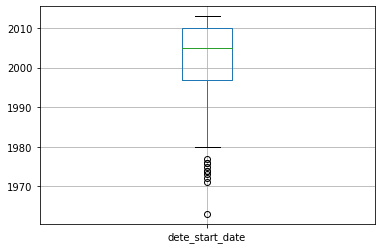

In [15]:
dete_resignations.boxplot(column='dete_start_date')

There's one especially outlying value (1963), as well a handful of other values in the 1970s.

<AxesSubplot:>

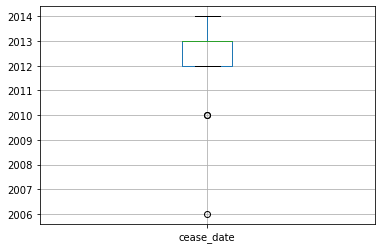

In [16]:
dete_resignations.boxplot(column='cease_date')

There are two outlying values here: 2006 and 2010.

<AxesSubplot:>

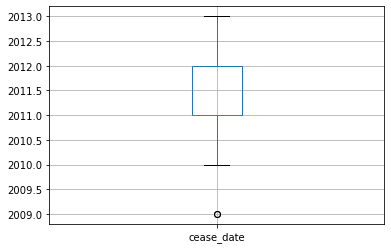

In [17]:
tafe_resignations.boxplot(column='cease_date')

There's one outlying value here: 2009.

We'll go ahead and drop these outlying rows.

In [18]:
# select rows of DETE dataset to eliminate
dete_rows_to_drop = dete_resignations.loc[(dete_resignations['dete_start_date'] == 1963.0) | 
                                          (dete_resignations['cease_date'] == 2006.0) |
                                          (dete_resignations['cease_date'] == 2010.0)]
# print length of dataset
print(len(dete_resignations))
# drop relevant rows by index
dete_resignations = dete_resignations.drop([416, 517, 586, 762])
# print length of dataset after updates to confirm deletion
print(len(dete_resignations))

311
307


In [19]:
# select rows of TAFE dataset to eliminate
tafe_rows_to_drop = tafe_resignations.loc[(tafe_resignations['cease_date'] == 2009.0)]
# print length of dataset
print(len(tafe_resignations))
# drop relevant rows by index
tafe_resignations = tafe_resignations.drop([8, 63])
# print length of dataset after updates to confirm deletion
print(len(tafe_resignations))

340
338


Having verified the years in the `dete_resignations` dataframe, I'll now create a new column to answer the first research question ("Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?"). 

In the `tafe_resignations` dataframe, there's already a length of service column (`institute_service`), but no such column exists in the `dete_resignations` dataframe. However, since employees' start and end dates are available, those values can be used to calculate length of service and to create a corresponding `institute_service` column in `dete_resignations`.

In [20]:
# create service column by subtracting start date from end date
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
# count unique values in new column
print(dete_resignations['institute_service'].value_counts().sort_index())

0.0     19
1.0     22
2.0     14
3.0     19
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     3
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
Name: institute_service, dtype: int64


Given the research questions for this project, the next step is to create a column for employees who resigned because they were dissatisfied. We'll identify such employees based on the reasons they gave for resignation:

- TAFE
    - `Contributing Factors. Dissatisfaction`
    - `Contributing Factors. Job Dissatisfaction`
- DETE
    - `job_dissatisfaction`
    - `dissatisfaction_with_the_department`
    - `physical_work_environment`
    - `lack_of_recognition`
    - `lack_of_job_security`
    - `work_location`
    - `employment_conditions`
    - `work_life_balance`
    - `workload`
    
We'll start by viewing the values in the relevant columns of the TAFE dataset. (The DETE values are already booleans, so they don't need to be updated.)

In [21]:
# view values in 'Contributing Factors. Dissatisfaction' and 
# 'Contributing Factors. Job Dissatisfaction' in tafe_resignations
print('Values for first column:\n')
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts())
print('Values for second column:\n')
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts())

Values for first column:

-                                         275
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64
Values for second column:

-                      268
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


Next, we'll create a function that updates null values to `NaN`, hyphens to `False`, and anything else to `True`, then apply that function to the TAFE dataset.

In [22]:
# create function to update values; null --> NaN, - --> False, anything else --> True
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True

In [23]:
# apply update_vals to relevant columns
tafe_resignations[["Contributing Factors. Dissatisfaction", "Contributing Factors. Job Dissatisfaction"]] = tafe_resignations[["Contributing Factors. Dissatisfaction", "Contributing Factors. Job Dissatisfaction"]].applymap(update_vals)
# check updated values
print(tafe_resignations['Contributing Factors. Dissatisfaction'].head())
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].head())

3    False
4    False
5    False
6    False
7    False
Name: Contributing Factors. Dissatisfaction, dtype: object
3    False
4    False
5    False
6    False
7    False
Name: Contributing Factors. Job Dissatisfaction, dtype: object


As we can see from the printed values above, we've successfully converted the values in our two target columns to booleans. Next, we'll create a `dissatisfied` column in both datasets by scanning the dissatisfaction-related columns and extracting their values (retaining `NaN` values).

In [24]:
# create 'dissatisfied' columm in both datasets
dete_resignations['dissatisfied'] = dete_resignations[["job_dissatisfaction", "dissatisfaction_with_the_department", 
            "physical_work_environment", "lack_of_recognition", "lack_of_job_security", 
            "work_location", "employment_conditions", "work_life_balance", "workload"]].any(axis=1, skipna=False)
print(dete_resignations['dissatisfied'].head())
tafe_resignations['dissatisfied'] = tafe_resignations[["Contributing Factors. Dissatisfaction", 
                                                       "Contributing Factors. Job Dissatisfaction"]].any(axis=1, skipna=False)
print(tafe_resignations['dissatisfied'].head())

3     False
5      True
8     False
9      True
11    False
Name: dissatisfied, dtype: bool
3    False
4    False
5    False
6    False
7    False
Name: dissatisfied, dtype: object


In [25]:
# create copies of each dataset to avoid Setting with Copy warning
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

So far, we've:
- renamed columns;
- dropped data not needed for the analysis;
- verified data quality;
- created `institute_service` and `dissatisfied` columns; and
- cleaned the `contributing factors` columns.

Next, we'll combine the TAFE and DETE datasets. As a first step, we'll add a column that identifies which of the original datasets a given row belongs to, which we'll title `institute`.

In [26]:
# add institute column to DETE and TAFE datasets
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'
# check new column addition
print(dete_resignations_up['institute'])
print(tafe_resignations_up['institute'])

3      DETE
5      DETE
8      DETE
9      DETE
11     DETE
       ... 
808    DETE
815    DETE
816    DETE
819    DETE
821    DETE
Name: institute, Length: 307, dtype: object
3      TAFE
4      TAFE
5      TAFE
6      TAFE
7      TAFE
       ... 
696    TAFE
697    TAFE
698    TAFE
699    TAFE
701    TAFE
Name: institute, Length: 338, dtype: object


In [27]:
# combine dataframes
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index = True)
combined.head()

,id,separation_type,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,role_service
0,4.0,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.0,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.0,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.0,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12.0,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Before performing a more extensive analysis of our dataset, we'll need to (1) eliminate some of the columns above that aren't necessary for our analysis and (2) clean the `institute_service` column, whose values are currently in a variety of formats, as shown below:

In [28]:
print(combined['institute_service'].value_counts())

Less than 1 year      73
1-2                   64
3-4                   61
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   19
0.0                   19
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
22.0                   6
17.0                   6
14.0                   6
12.0                   6
16.0                   5
18.0                   5
23.0                   4
24.0                   4
19.0                   3
11.0                   3
21.0                   3
39.0                   3
32.0                   3
36.0                   2
30.0                   2
28.0                   2
26.0                   2
25.0                   2
29.0                   1


First, we'll delete any columns with less than 500 non-null values.

In [29]:
combined_updated = combined.dropna(axis=1,thresh=500)
combined_updated.head()

,id,separation_type,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
0,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7,False,DETE
1,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE
2,9.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3,False,DETE
3,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DETE
4,12.0,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3,False,DETE


Now that we have a much more manageable number of columns, we'll clean the values in the `institute_service` column. While there are several ways to handle this, for this project, we'll divide lengths of service into career stages within the organization:
- New: Less than 3 years
- Experienced: 3–6 years
- Established: 7–10 years
- Veteran: 11 or more years

A more comprehensive explanation of the rationale for this decision is available [here](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage).

First, we'll convert all values in this column to numbers. We'll treat the non-numeric values in the original table as follows:

| Value in original dataset | Associated range  | Converted value (career stage) |
|---------------------------|-------------------|--------------------------------|
| Less than 1 year          | Less than 3 years | New                            |
| 1–2                       | Less than 3 years | New                            |
| 3–4                       | 3–6 years         | Experienced                    |
| 5–6                       | 3–6 years         | Experienced                    |
| 7–10                      | 7–10 years        | Established                    |
| 11–20                     | 11 or more years  | Veteran                        |
| More than 20 years        | 11 or more years  | Veteran                        |

In [30]:
#create copy to avoid setting with copy warning
combined_updated = combined_updated.copy()
# change ranges to numbers in institute_service column
ranges_map = {'Less than 1 year':'1', '1-2':'2', '3-4':'4',
              '5-6':'6', '7-10':'10', '11-20':'20',
              'More than 20 years':'20'}
combined_updated['institute_service'].replace(ranges_map, inplace=True)
# convert all to floats
combined_updated['institute_service'] = combined_updated['institute_service'].astype(float)
# check changes
print(combined_updated['institute_service'].value_counts())

1.0     95
2.0     78
4.0     77
6.0     50
20.0    43
10.0    27
5.0     23
3.0     19
0.0     19
9.0     14
7.0     13
13.0     8
8.0      8
15.0     7
22.0     6
17.0     6
14.0     6
12.0     6
16.0     5
18.0     5
24.0     4
23.0     4
21.0     3
19.0     3
11.0     3
32.0     3
39.0     3
36.0     2
26.0     2
28.0     2
25.0     2
30.0     2
29.0     1
35.0     1
42.0     1
27.0     1
41.0     1
38.0     1
34.0     1
33.0     1
31.0     1
Name: institute_service, dtype: int64


Next, we'll define a function that maps each of these values to one of our predefined career stages—to recap, these stages are:
- New: Less than 3 years
- Experienced: 3–6 years
- Established: 7–10 years
- Veteran: 11 or more years

In [31]:
# map values to their respective categories
def career_stage_map(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3:
        return 'New'
    elif val < 7:
        return 'Experienced'
    elif val < 11:
        return 'Established'
    else:
        return 'Veteran'
# apply above function to dataset, creating a new column for career stage
combined_updated['service_cat'] = combined_updated['institute_service'].apply(career_stage_map)
# check new column
print(combined_updated['service_cat'].value_counts(dropna=False))

New            192
Experienced    169
Veteran        134
NaN             88
Established     62
Name: service_cat, dtype: int64


As we can see from the above, we've successfully created a new column representing career stage (`service_cat`). The number of employees in each category decreases linearly with length of service. Our next step is to calculate the percentage of dissatisfied employees within each service category group.

In [39]:
# check number of true, false, and missing values in dissatisfied column
print(combined_updated['dissatisfied'].value_counts(dropna=False))
# fill the eight missing values with false (most common value)
combined_updated = combined_updated.fillna(value={'dissatisfied': False})
# check that values have been changed
print(combined_updated['dissatisfied'].value_counts(dropna=False))

False    397
True     240
NaN        8
Name: dissatisfied, dtype: int64
False    405
True     240
Name: dissatisfied, dtype: int64


Text(0.5, 0, 'Service Category')

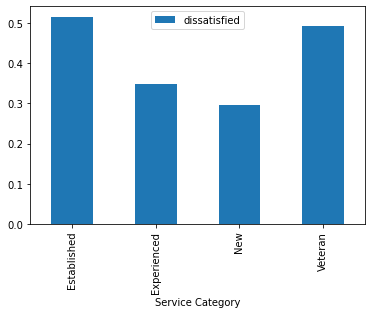

In [45]:
# Use the DataFrame.pivot_table() method to calculate the percentage of 
# dissatisfied employees in each service_cat group.
# Since a True value is considered to be 1, calculating the mean 
# will also calculate the percentage of dissatisfied employees. 
# The default aggregation function is the mean, so you can exclude the aggfunc argument.

table = combined_updated.pivot_table('dissatisfied', 'service_cat')
%matplotlib inline
fig = table.plot(kind='bar')
fig.set_xlabel('Service Category')

As we can see above, established employees are the most likely to be dissatisfied, followed closely by veteran employees. New employees tend to be the least dissatisfied. There are several possible explanations for this; for example, those who are less established in their careers may be more likely to switch jobs for reasons related to career changes, career advancement at other companies, and family and relationships, whereas those who have been established in their careers longer may be unlikely to leave a job unless they are retiring or unhappy.